# PreMLCheck Library - Complete Demo

This notebook demonstrates **all features** of the PreMLCheck library.

PreMLCheck analyzes your dataset **before training** and tells you:
1. Task Type (Classification or Regression)
2. Dataset Quality Score (0-100)
3. Overfitting Risk (Low / Medium / High)
4. Best Model Recommendations
5. Expected Performance Estimate
6. Preprocessing Suggestions
7. Full Report Generation (Markdown / HTML / JSON)
8. Visualizations (Correlation, Missing Values, Quality Radar, Model Comparison)

---
## 1. Setup & Imports

In [26]:
import sys
import os
import warnings
warnings.filterwarnings('ignore')

# Add the project root to path so we can import premlcheck
sys.path.insert(0, os.path.abspath('..'))

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris, load_diabetes, make_classification, make_regression

# Import PreMLCheck
from premlcheck import PreMLCheck
from premlcheck import (
    TaskDetector,
    QualityChecker,
    OverfittingPredictor,
    ModelRecommender,
    PerformanceEstimator,
    PreprocessingAdvisor,
    ReportGenerator,
)

import premlcheck
print(f"PreMLCheck version: {premlcheck.__version__}")
print(f"Author: {premlcheck.__author__}")
print("All imports successful!")

PreMLCheck version: 0.1.0
Author: Your Name
All imports successful!


---
## 2. Create Sample Datasets

We will create two datasets:
- **Classification dataset** (Iris-like with some issues added)
- **Regression dataset** (Diabetes-like)

In [27]:
# ---- Classification Dataset ----
np.random.seed(42)

n_samples = 200
classification_df = pd.DataFrame({
    'age': np.random.randint(18, 80, n_samples),
    'income': np.random.normal(50000, 15000, n_samples).round(2),
    'credit_score': np.random.randint(300, 850, n_samples),
    'loan_amount': np.random.normal(20000, 8000, n_samples).round(2),
    'employment_years': np.random.randint(0, 40, n_samples),
    'num_dependents': np.random.choice([0, 1, 2, 3, 4], n_samples),
    'has_mortgage': np.random.choice(['Yes', 'No'], n_samples),
    'education': np.random.choice(['High School', 'Bachelor', 'Master', 'PhD'], n_samples),
    'approved': np.random.choice(['Yes', 'No'], n_samples, p=[0.65, 0.35]),  # slight imbalance
})

# Add some missing values to make it realistic
missing_indices = np.random.choice(n_samples, size=15, replace=False)
classification_df.loc[missing_indices, 'income'] = np.nan
missing_indices2 = np.random.choice(n_samples, size=10, replace=False)
classification_df.loc[missing_indices2, 'credit_score'] = np.nan

# Add a redundant/correlated feature
classification_df['income_scaled'] = classification_df['income'] * 1.02 + np.random.normal(0, 100, n_samples)

print("Classification Dataset:")
print(f"  Shape: {classification_df.shape}")
print(f"  Target: 'approved'")
print(f"  Missing values: {classification_df.isnull().sum().sum()}")
classification_df.head()

Classification Dataset:
  Shape: (200, 10)
  Target: 'approved'
  Missing values: 40


,age,income,credit_score,loan_amount,employment_years,num_dependents,has_mortgage,education,approved,income_scaled
0,56,46704.92,774.0,13023.17,26,4,Yes,Bachelor,Yes,47753.251045
1,69,55356.69,679.0,14631.81,4,0,No,PhD,No,56351.741563
2,46,72168.41,844.0,22687.59,19,1,Yes,Master,No,73451.864551
3,32,42225.95,726.0,23955.27,10,3,Yes,High School,Yes,43029.796692
4,60,37872.60,567.0,19986.91,9,4,No,PhD,No,38621.217734


In [28]:
# ---- Regression Dataset ----
np.random.seed(42)

n_samples_reg = 300
regression_df = pd.DataFrame({
    'square_feet': np.random.randint(500, 5000, n_samples_reg),
    'bedrooms': np.random.randint(1, 6, n_samples_reg),
    'bathrooms': np.random.choice([1, 1.5, 2, 2.5, 3], n_samples_reg),
    'garage_size': np.random.choice([0, 1, 2, 3], n_samples_reg),
    'year_built': np.random.randint(1960, 2024, n_samples_reg),
    'lot_size': np.random.normal(8000, 3000, n_samples_reg).round(0),
    'neighborhood_rating': np.random.randint(1, 11, n_samples_reg),
})

# Create a realistic target (house price)
regression_df['price'] = (
    regression_df['square_feet'] * 150 +
    regression_df['bedrooms'] * 10000 +
    regression_df['bathrooms'] * 15000 +
    regression_df['neighborhood_rating'] * 20000 +
    np.random.normal(0, 30000, n_samples_reg)
).round(2)

print("Regression Dataset:")
print(f"  Shape: {regression_df.shape}")
print(f"  Target: 'price'")
print(f"  Missing values: {regression_df.isnull().sum().sum()}")
regression_df.head()

Regression Dataset:
  Shape: (300, 8)
  Target: 'price'
  Missing values: 0


,square_feet,bedrooms,bathrooms,garage_size,year_built,lot_size,neighborhood_rating,price
0,1360,4,3.0,1,2007,10140.0,6,417021.77
1,4272,3,3.0,0,1977,8141.0,2,765450.93
2,3592,4,2.0,3,1966,11670.0,1,608757.29
3,966,2,3.0,3,1969,5950.0,7,379661.27
4,4926,2,1.5,2,1966,6470.0,7,916151.21


---
## 3. Full Analysis - Classification Dataset

Run the complete PreMLCheck pipeline with a single call.

In [29]:
# Initialize the analyzer
analyzer = PreMLCheck()

# Run the full analysis
results = analyzer.analyze(classification_df, target_column='approved')

# Print the summary
print(results.summary())

PreMLCheck Analysis Summary

 Task Type: classification (confidence: 95.0%)

 Dataset Health Score: 94.8/100

 Overfitting Risk: Low

 Recommended Models: 3 suggestions

 Expected Performance: {'metric': 'accuracy', 'estimated_score': 0.645, 'lower_bound': 0.5081504475710644, 'upper_bound': 0.7818495524289356, 'confidence_level': 'Low', 'description': 'Expected accuracy: 64.5% (± 13.7%)'}

 Preprocessing Steps: 4 recommendations



---
## 4. Explore Each Module Individually

### 4.1 Task Detection

In [30]:
print("=" * 50)
print("MODULE 1: Task Type Detection")
print("=" * 50)

print(f"\nDetected Task Type : {results.task_type}")
print(f"Confidence         : {results.task_confidence:.1%}")

# You can also use TaskDetector directly
detector = TaskDetector()
task_type, confidence = detector.detect(classification_df['approved'])
print(f"\nDirect call result : {task_type} (confidence: {confidence:.1%})")

# Test with regression target
task_type_reg, conf_reg = detector.detect(regression_df['price'])
print(f"Regression target  : {task_type_reg} (confidence: {conf_reg:.1%})")

MODULE 1: Task Type Detection

Detected Task Type : classification
Confidence         : 95.0%

Direct call result : classification (confidence: 95.0%)
Regression target  : regression (confidence: 95.0%)


### 4.2 Dataset Quality Check

In [31]:
print("=" * 50)
print("MODULE 2: Dataset Quality Assessment")
print("=" * 50)

print(f"\nHealth Score: {results.quality_score:.1f} / 100")

print("\n--- Quality Details ---")
for key, value in results.quality_details.items():
    print(f"\n  {key}:")
    if isinstance(value, dict):
        for k, v in value.items():
            print(f"    {k}: {v}")
    else:
        print(f"    {value}")

MODULE 2: Dataset Quality Assessment

Health Score: 94.8 / 100

--- Quality Details ---

  missing_values:
    total_missing_ratio: 0.022222222222222223
    columns_with_missing: ['income', 'credit_score', 'income_scaled']
    worst_column: income
    worst_column_ratio: 0.075
    target_missing_ratio: 0.0

  class_imbalance:
    imbalance_ratio: 2.389830508474576
    majority_class: Yes
    minority_class: No
    distribution: {'Yes': 141, 'No': 59}

  feature_redundancy:
    n_highly_correlated: 1
    correlated_pairs: [('income_scaled', 'income', 0.9999787960363873)]

  sample_feature_ratio:
    n_samples: 200
    n_features: 9
    ratio: 22.22222222222222
    is_sufficient: True

  data_types:
    dtype_distribution: {'float64': 4, 'int32': 2, 'object': 2, 'int64': 1}
    n_numeric: 7
    n_categorical: 2
    n_mixed_types: 0

  penalties:
    [('missing_values', 2.2222222222222223), ('feature_redundancy', 3)]

  total_penalty:
    5.222222222222222


### 4.3 Overfitting Risk Prediction

In [32]:
print("=" * 50)
print("MODULE 3: Overfitting Risk Prediction")
print("=" * 50)

print(f"\nRisk Level: {results.overfitting_risk}")

print("\n--- Risk Factors ---")
if results.overfitting_factors:
    for factor in results.overfitting_factors:
        print(f"  - {factor.get('factor', 'N/A')}: {factor.get('description', 'N/A')}")
        if 'severity' in factor:
            print(f"    Severity: {factor['severity']}")
else:
    print("  No significant risk factors found!")

MODULE 3: Overfitting Risk Prediction

Risk Level: Low

--- Risk Factors ---
  - Small dataset: 200 samples. May benefit from regularization.
    Severity: Medium


### 4.4 Model Recommendations

In [33]:
print("=" * 50)
print("MODULE 4: Model Recommendations")
print("=" * 50)

print(f"\nTotal models recommended: {len(results.model_recommendations)}")
print("\n--- Ranked Recommendations ---")
for i, rec in enumerate(results.model_recommendations, 1):
    print(f"\n  {i}. {rec.name}")
    print(f"     Score  : {rec.score:.1f}/100")
    print(f"     Reason : {rec.reason}")

MODULE 4: Model Recommendations

Total models recommended: 3

--- Ranked Recommendations ---

  1. Logistic Regression
     Score  : 70.0/100
     Reason : Recommended because it works well with small datasets

  2. Naive Bayes
     Score  : 65.0/100
     Reason : Recommended because it works well with limited data, and fast and simple

  3. Decision Tree
     Score  : 55.0/100
     Reason : Recommended because it interpretable and fast


### 4.5 Performance Estimation

In [34]:
print("=" * 50)
print("MODULE 5: Performance Estimation")
print("=" * 50)

print("\n--- Estimated Performance (before full training) ---")
if results.performance_estimate:
    for key, value in results.performance_estimate.items():
        if isinstance(value, float):
            print(f"  {key}: {value:.4f}")
        else:
            print(f"  {key}: {value}")
else:
    print("  No performance estimate available.")

MODULE 5: Performance Estimation

--- Estimated Performance (before full training) ---
  metric: accuracy
  estimated_score: 0.6450
  lower_bound: 0.5082
  upper_bound: 0.7818
  confidence_level: Low
  description: Expected accuracy: 64.5% (± 13.7%)


### 4.6 Preprocessing Suggestions

In [35]:
print("=" * 50)
print("MODULE 6: Preprocessing Suggestions")
print("=" * 50)

print(f"\nTotal suggestions: {len(results.preprocessing_suggestions)}")
print("\n--- Suggestions (sorted by priority) ---")
for i, sugg in enumerate(results.preprocessing_suggestions, 1):
    print(f"\n  {i}. [{sugg.priority}] {sugg.action}")
    print(f"     Description: {sugg.description}")
    if hasattr(sugg, 'code_example') and sugg.code_example:
        print(f"     Code: {sugg.code_example}")

MODULE 6: Preprocessing Suggestions

Total suggestions: 4

--- Suggestions (sorted by priority) ---

  1. [High] Remove Redundant Features
     Description: 1 highly correlated feature pairs found.
     Code: # Remove highly correlated features
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col] > 0.95)]
X_reduced = X.drop(columns=to_drop)

  2. [High] Encode Categorical Variables
     Description: 2 categorical columns need encoding (one-hot, label, or target encoding).
     Code: # One-hot encoding for low cardinality
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[categorical_columns])

# Or label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['encoded_col'] = le.fit_transform(X['categorical_col'])

  3. [Medium] Scale Features
     Descript

---
## 5. Full Analysis - Regression Dataset

Now let's run the same analysis on the regression dataset.

In [36]:
# Run analysis on regression dataset
results_reg = analyzer.analyze(regression_df, target_column='price')

print(results_reg.summary())

PreMLCheck Analysis Summary

 Task Type: regression (confidence: 95.0%)

 Dataset Health Score: 100.0/100

 Overfitting Risk: Low

 Recommended Models: 3 suggestions

 Expected Performance: {'metric': 'r2_score', 'estimated_score': 0.9076768398754579, 'lower_bound': 0.8737207018088344, 'upper_bound': 0.9416329779420813, 'mean_absolute_error': 48350.761254711084, 'confidence_level': 'Low', 'description': 'Expected R² score: 0.908 (± 0.034), MAE: 48350.76'}

 Preprocessing Steps: 1 recommendations



In [37]:
# Compare Classification vs Regression results side by side
print("=" * 60)
print("COMPARISON: Classification vs Regression")
print("=" * 60)

comparison = {
    'Metric': [
        'Task Type',
        'Confidence',
        'Quality Score',
        'Overfitting Risk',
        'Num Recommendations',
        'Num Suggestions',
    ],
    'Classification': [
        results.task_type,
        f"{results.task_confidence:.1%}",
        f"{results.quality_score:.1f}/100",
        results.overfitting_risk,
        len(results.model_recommendations),
        len(results.preprocessing_suggestions),
    ],
    'Regression': [
        results_reg.task_type,
        f"{results_reg.task_confidence:.1%}",
        f"{results_reg.quality_score:.1f}/100",
        results_reg.overfitting_risk,
        len(results_reg.model_recommendations),
        len(results_reg.preprocessing_suggestions),
    ],
}

comparison_df = pd.DataFrame(comparison)
comparison_df.set_index('Metric', inplace=True)
comparison_df

COMPARISON: Classification vs Regression


,Classification,Regression
Metric,,
Task Type,classification,regression
Confidence,95.0%,95.0%
Quality Score,94.8/100,100.0/100
Overfitting Risk,Low,Low
Num Recommendations,3,3
Num Suggestions,4,1


---
## 6. Utility Functions Demo

PreMLCheck also provides standalone utility functions.

In [38]:
from premlcheck.utils import (
    calculate_data_statistics,
    calculate_class_balance_score,
    calculate_feature_correlation_stats,
    calculate_missing_value_profile,
    calculate_outlier_stats,
)

# --- Data Statistics ---
print("=" * 50)
print("Data Statistics")
print("=" * 50)
stats = calculate_data_statistics(classification_df)
print(f"  Rows            : {stats['n_rows']}")
print(f"  Columns         : {stats['n_columns']}")
print(f"  Memory (MB)     : {stats['memory_usage_mb']:.3f}")
print(f"  Missing cells   : {stats['missing_cells']}")
print(f"  Missing %       : {stats['missing_percentage']:.2f}%")
print(f"  Numeric cols    : {stats.get('numeric_columns', 0)}")
print(f"  Categorical cols: {stats.get('categorical_columns', 0)}")

Data Statistics
  Rows            : 200
  Columns         : 10
  Memory (MB)     : 0.044
  Missing cells   : 40
  Missing %       : 2.00%
  Numeric cols    : 7
  Categorical cols: 3


In [39]:
# --- Class Balance Score ---
print("=" * 50)
print("Class Balance Score")
print("=" * 50)
balance = calculate_class_balance_score(classification_df['approved'])
print(f"  Balance Score : {balance['balance_score']}")
print(f"  Num Classes   : {balance['n_classes']}")
print(f"  Distribution  : {balance['distribution']}")

Class Balance Score
  Balance Score : 0.59
  Num Classes   : 2
  Distribution  : {'Yes': 141, 'No': 59}


In [40]:
# --- Feature Correlation Stats ---
print("=" * 50)
print("Feature Correlation Stats")
print("=" * 50)
feature_cols = ['age', 'income', 'credit_score', 'loan_amount', 'employment_years', 'income_scaled']
corr_stats = calculate_feature_correlation_stats(classification_df[feature_cols])
print(f"  Numeric features   : {corr_stats['n_numeric_features']}")
print(f"  Mean abs corr      : {corr_stats['mean_abs_correlation']}")
print(f"  Median abs corr    : {corr_stats['median_abs_correlation']}")
print(f"  Max abs corr       : {corr_stats['max_abs_correlation']}")
print(f"  Pairs above 0.90   : {corr_stats['n_pairs_above_090']}")
print(f"  Pairs above 0.95   : {corr_stats['n_pairs_above_095']}")

Feature Correlation Stats
  Numeric features   : 6
  Mean abs corr      : 0.1158
  Median abs corr    : 0.0559
  Max abs corr       : 1.0
  Pairs above 0.90   : 1
  Pairs above 0.95   : 1


In [41]:
# --- Missing Value Profile ---
print("=" * 50)
print("Missing Value Profile")
print("=" * 50)
missing = calculate_missing_value_profile(classification_df)
print(f"  Total missing ratio : {missing['total_missing_ratio']}")
print(f"  Complete columns    : {missing['complete_columns']}")
print(f"  Columns with missing:")
for col_info in missing['columns_missing']:
    print(f"    - {col_info['column']}: {col_info['count']} missing ({col_info['ratio']:.1%})")

Missing Value Profile
  Total missing ratio : 0.02
  Complete columns    : 7
  Columns with missing:
    - income: 15 missing (7.5%)
    - income_scaled: 15 missing (7.5%)
    - credit_score: 10 missing (5.0%)


In [42]:
# --- Outlier Stats ---
print("=" * 50)
print("Outlier Statistics (IQR-based)")
print("=" * 50)
outliers = calculate_outlier_stats(classification_df[feature_cols])
print(f"  Total outliers     : {outliers['total_outliers']}")
print(f"  Outlier ratio      : {outliers['total_outlier_ratio']:.2%}")
print(f"  Columns checked    : {outliers['n_columns_checked']}")
if outliers['columns_with_outliers']:
    print(f"  Columns with outliers:")
    for col_info in outliers['columns_with_outliers']:
        print(f"    - {col_info['column']}: {col_info['outlier_count']} outliers ({col_info['outlier_ratio']:.1%})")
else:
    print("  No outliers detected!")

Outlier Statistics (IQR-based)
  Total outliers     : 5
  Outlier ratio      : 0.43%
  Columns checked    : 6
  Columns with outliers:
    - income: 2 outliers (1.1%)
    - income_scaled: 2 outliers (1.1%)
    - loan_amount: 1 outliers (0.5%)


---
## 7. Input Validation Demo

PreMLCheck includes validators to catch input errors early.

In [43]:
from premlcheck.utils import (
    validate_dataframe,
    validate_target_column,
    validate_feature_columns,
    validate_report_format,
    validate_output_path,
    validate_numeric_features,
)

# --- Valid inputs ---
print("Testing valid inputs:")
try:
    validate_dataframe(classification_df, min_rows=10)
    print("  validate_dataframe       : PASS")
except Exception as e:
    print(f"  validate_dataframe       : FAIL - {e}")

try:
    validate_target_column(classification_df, 'approved')
    print("  validate_target_column   : PASS")
except Exception as e:
    print(f"  validate_target_column   : FAIL - {e}")

try:
    cols = validate_feature_columns(classification_df, target_column='approved')
    print(f"  validate_feature_columns : PASS ({len(cols)} features)")
except Exception as e:
    print(f"  validate_feature_columns : FAIL - {e}")

try:
    validate_report_format('markdown')
    print("  validate_report_format   : PASS")
except Exception as e:
    print(f"  validate_report_format   : FAIL - {e}")

try:
    validate_numeric_features(classification_df.drop(columns=['approved']))
    print("  validate_numeric_features: PASS")
except Exception as e:
    print(f"  validate_numeric_features: FAIL - {e}")

# --- Invalid inputs (should raise errors) ---
print("\nTesting invalid inputs (expected errors):")
try:
    validate_dataframe("not a dataframe")
    print("  invalid dataframe : DID NOT CATCH (bad!)")
except TypeError as e:
    print(f"  invalid dataframe : Caught correctly -> {e}")

try:
    validate_target_column(classification_df, 'nonexistent_col')
    print("  missing column    : DID NOT CATCH (bad!)")
except ValueError as e:
    print(f"  missing column    : Caught correctly -> {e}")

try:
    validate_report_format('pdf')
    print("  bad format        : DID NOT CATCH (bad!)")
except ValueError as e:
    print(f"  bad format        : Caught correctly -> {e}")

Testing valid inputs:
  validate_dataframe       : PASS
  validate_target_column   : PASS
  validate_feature_columns : PASS (9 features)
  validate_report_format   : PASS
  validate_numeric_features: PASS

Testing invalid inputs (expected errors):
  invalid dataframe : Caught correctly -> Expected pandas DataFrame, got str
  missing column    : Caught correctly -> Target column 'nonexistent_col' not found in DataFrame. Available columns: ['age', 'income', 'credit_score', 'loan_amount', 'employment_years', 'num_dependents', 'has_mortgage', 'education', 'approved', 'income_scaled']
  bad format        : Caught correctly -> Unsupported report format 'pdf'. Supported formats: markdown, html, json


---
## 8. Report Generation

Generate full analysis reports in different formats.

In [44]:
import tempfile

# --- Markdown Report ---
md_path = os.path.join(tempfile.gettempdir(), 'premlcheck_report.md')
analyzer.generate_report(results, md_path, format='markdown')
print(f"Markdown report saved: {md_path}")

# Read and display the first 50 lines
with open(md_path, 'r', encoding='utf-8') as f:
    content = f.read()
print(f"\nReport length: {len(content)} characters")
print("\n--- Report Preview (first 40 lines) ---")
for line in content.split('\n')[:40]:
    print(line)

Markdown report saved: C:\Users\LAPTOP~1\AppData\Local\Temp\premlcheck_report.md

Report length: 2890 characters

--- Report Preview (first 40 lines) ---
# PreMLCheck Analysis Report

**Generated:** 2026-02-14 09:56:05

---

## 📊 Task Type Detection

- **Task Type:** classification
- **Confidence:** 95.0%

## 💯 Dataset Quality Assessment

**Health Score:** 94.8/100

### Missing Values
- Total missing: 2.22%
- Affected columns: 3

### Dataset Dimensions
- Samples: 200
- Features: 9
- Ratio: 22.2 samples per feature

## ⚠️ Overfitting Risk Assessment

**Risk Level:** Low

### Risk Factors:

**Small dataset** (*Medium severity*)
- 200 samples. May benefit from regularization.

## 🎯 Model Recommendations


### 1. Logistic Regression
- **Suitability Score:** 70.0/100
- **Reason:** Recommended because it works well with small datasets



In [45]:
# --- JSON Report ---
import json

json_path = os.path.join(tempfile.gettempdir(), 'premlcheck_report.json')
analyzer.generate_report(results, json_path, format='json')
print(f"JSON report saved: {json_path}")

with open(json_path, 'r', encoding='utf-8') as f:
    report_json = json.load(f)

print(f"\nJSON Keys: {list(report_json.keys())}")
print(f"\nPretty-printed JSON (truncated):")
print(json.dumps(report_json, indent=2)[:800])

JSON report saved: C:\Users\LAPTOP~1\AppData\Local\Temp\premlcheck_report.json

JSON Keys: ['generated_at', 'task_type', 'task_confidence', 'quality_score', 'quality_details', 'overfitting_risk', 'overfitting_factors', 'model_recommendations', 'performance_estimate', 'preprocessing_suggestions']

Pretty-printed JSON (truncated):
{
  "generated_at": "2026-02-14T09:56:05.327798",
  "task_type": "classification",
  "task_confidence": 0.95,
  "quality_score": 94.77777777777777,
  "quality_details": {
    "missing_values": {
      "total_missing_ratio": 0.022222222222222223,
      "columns_with_missing": [
        "income",
        "credit_score",
        "income_scaled"
      ],
      "worst_column": "income",
      "worst_column_ratio": 0.075,
      "target_missing_ratio": 0.0
    },
    "class_imbalance": {
      "imbalance_ratio": 2.389830508474576,
      "majority_class": "Yes",
      "minority_class": "No",
      "distribution": {
        "Yes": 141,
        "No": 59
      }
    },
  

In [46]:
# --- HTML Report ---
html_path = os.path.join(tempfile.gettempdir(), 'premlcheck_report.html')
analyzer.generate_report(results, html_path, format='html')
print(f"HTML report saved: {html_path}")
print("You can open this file in a browser to view the full report!")

HTML report saved: C:\Users\LAPTOP~1\AppData\Local\Temp\premlcheck_report.html
You can open this file in a browser to view the full report!


---
## 9. Custom Configuration

You can customize thresholds to suit your needs.

In [47]:
# Strict configuration (lower thresholds = more warnings)
strict_config = {
    'quality_thresholds': {
        'missing_values_max': 0.05,     # Flag if >5% missing (default: 30%)
        'imbalance_ratio_max': 3.0,     # Flag if ratio >3:1 (default: 10)
        'correlation_threshold': 0.80,  # Flag if corr >0.80 (default: 0.95)
    },
}

strict_analyzer = PreMLCheck(config=strict_config)
strict_results = strict_analyzer.analyze(classification_df, target_column='approved')

print("Comparison: Default vs Strict Config")
print(f"{'Metric':<25} {'Default':>10} {'Strict':>10}")
print("-" * 47)
print(f"{'Quality Score':<25} {results.quality_score:>10.1f} {strict_results.quality_score:>10.1f}")
print(f"{'Overfitting Risk':<25} {results.overfitting_risk:>10} {strict_results.overfitting_risk:>10}")
print(f"{'Suggestions Count':<25} {len(results.preprocessing_suggestions):>10} {len(strict_results.preprocessing_suggestions):>10}")

Comparison: Default vs Strict Config
Metric                       Default     Strict
-----------------------------------------------
Quality Score                   94.8       94.8
Overfitting Risk                 Low        Low
Suggestions Count                  4          4


---
## 10. Testing with Scikit-learn Datasets

Let's test with real ML datasets from scikit-learn.

In [48]:
# --- Iris Dataset (Classification) ---
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

print("=" * 60)
print("IRIS DATASET ANALYSIS")
print("=" * 60)
iris_results = analyzer.analyze(iris_df, target_column='species')
print(iris_results.summary())

IRIS DATASET ANALYSIS
PreMLCheck Analysis Summary

 Task Type: classification (confidence: 87.5%)

 Dataset Health Score: 97.0/100

 Overfitting Risk: Low

 Recommended Models: 3 suggestions

 Expected Performance: {'metric': 'accuracy', 'estimated_score': 0.96, 'lower_bound': 0.9279933340276331, 'upper_bound': 0.9920066659723669, 'confidence_level': 'Low', 'description': 'Expected accuracy: 96.0% (± 3.2%)'}

 Preprocessing Steps: 1 recommendations



In [49]:
# --- Diabetes Dataset (Regression) ---
diabetes = load_diabetes()
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['progression'] = diabetes.target

print("=" * 60)
print("DIABETES DATASET ANALYSIS")
print("=" * 60)
diabetes_results = analyzer.analyze(diabetes_df, target_column='progression')
print(diabetes_results.summary())

DIABETES DATASET ANALYSIS
PreMLCheck Analysis Summary

 Task Type: regression (confidence: 70.0%)

 Dataset Health Score: 100.0/100

 Overfitting Risk: Low

 Recommended Models: 3 suggestions

 Expected Performance: {'metric': 'r2_score', 'estimated_score': 0.20619348372581503, 'lower_bound': 0.0336741910943231, 'upper_bound': 0.37871277635730694, 'mean_absolute_error': 53.323775683202406, 'confidence_level': 'Low', 'description': 'Expected R² score: 0.206 (± 0.173), MAE: 53.32'}



---
## 11. Edge Case: Messy Dataset

Let's test with a deliberately problematic dataset to see how PreMLCheck handles issues.

In [50]:
np.random.seed(42)

# Create a messy dataset
messy_df = pd.DataFrame({
    'feat1': np.random.randn(50),
    'feat2': np.random.randn(50),
    'feat3': np.random.randn(50) * 0.01 + np.random.randn(50),  # partly correlated with feat2
    'feat4': np.concatenate([np.random.randn(40), [np.nan] * 10]),  # 20% missing
    'feat5': np.concatenate([np.random.randn(35), [np.nan] * 15]),  # 30% missing
    'feat6': np.random.randn(50),
    'feat7': np.random.randn(50),
    'feat8': np.random.randn(50),
    'feat9': np.random.randn(50),
    'feat10': np.random.randn(50),
    # Heavily imbalanced target (90% class 0, 10% class 1)
    'target': np.concatenate([np.zeros(45), np.ones(5)]).astype(int),
})

print("=" * 60)
print("MESSY DATASET ANALYSIS (many issues expected)")
print("=" * 60)
print(f"Shape: {messy_df.shape}")
print(f"Missing: {messy_df.isnull().sum().sum()} cells")
print(f"Target distribution: {dict(pd.Series(messy_df['target']).value_counts())}")

messy_results = analyzer.analyze(messy_df, target_column='target')
print("\n" + messy_results.summary())

MESSY DATASET ANALYSIS (many issues expected)
Shape: (50, 11)
Missing: 25 cells
Target distribution: {0: np.int64(45), 1: np.int64(5)}

PreMLCheck Analysis Summary

 Task Type: classification (confidence: 90.0%)

 Dataset Health Score: 85.0/100

 Overfitting Risk: Medium

 Recommended Models: 6 suggestions

 Expected Performance: {'metric': 'accuracy', 'estimated_score': 0.8400000000000001, 'lower_bound': 0.7616000000000002, 'upper_bound': 0.9184, 'confidence_level': 'Low', 'description': 'Expected accuracy: 84.0% (± 7.8%)'}

 Preprocessing Steps: 3 recommendations



---
## 12. Visualizations

PreMLCheck includes **6 built-in visualization functions** (requires `matplotlib` and `seaborn`).

These plots help you visually understand your dataset before training.

In [51]:
# Import visualization functions
import matplotlib
matplotlib.use('Agg')  # Use non-interactive backend
%matplotlib inline

from premlcheck.utils import (
    plot_correlation_matrix,
    plot_target_distribution,
    plot_missing_values,
    plot_quality_radar,
    plot_model_comparison,
    plot_feature_importance,
)

print("All visualization imports successful!")

All visualization imports successful!


### 12.1 Correlation Matrix Heatmap

Visualize pairwise feature correlations to identify redundant features.

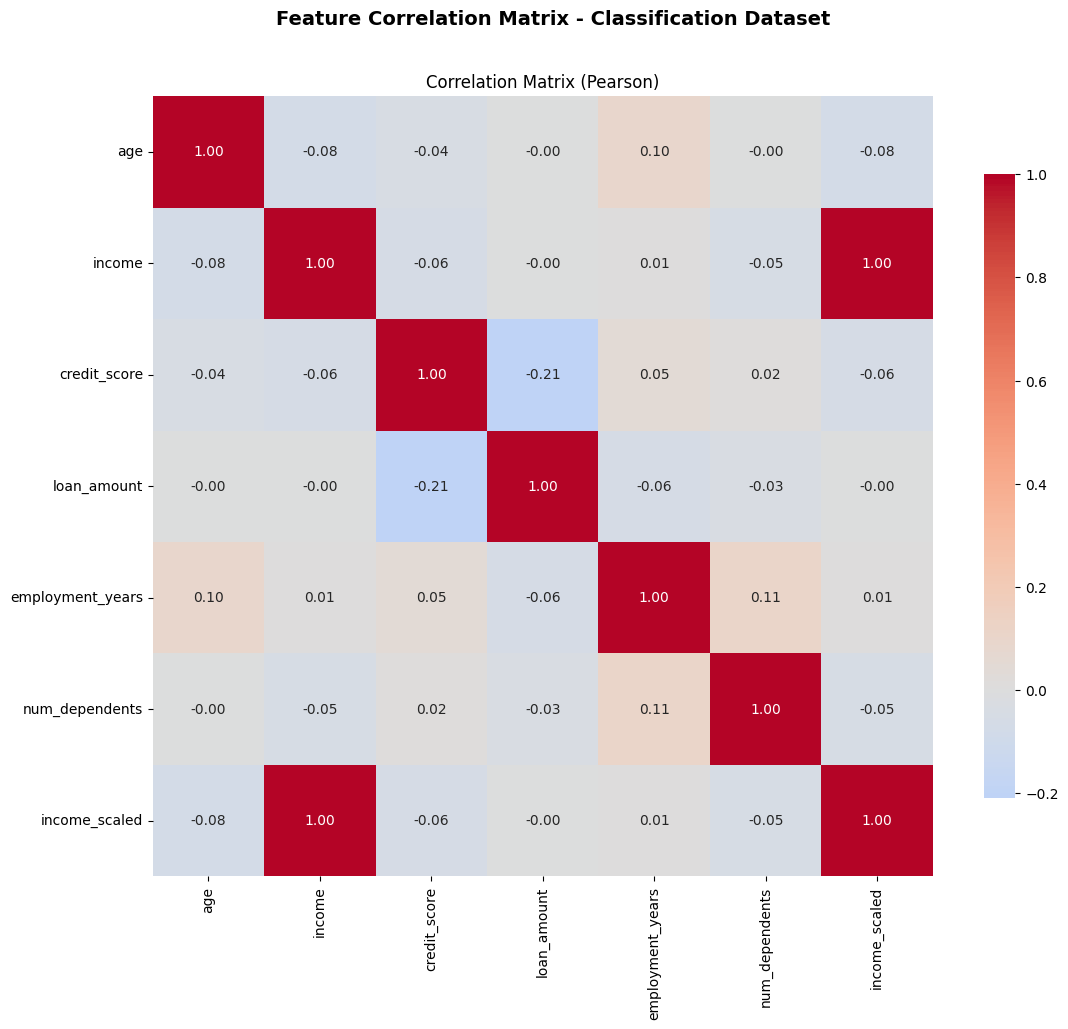

In [52]:
# Plot correlation matrix for numeric features
numeric_df = classification_df.select_dtypes(include=[np.number])
fig, ax = plot_correlation_matrix(numeric_df, figsize=(12, 10))
fig.suptitle('Feature Correlation Matrix - Classification Dataset', fontsize=14, fontweight='bold', y=1.02)
fig.tight_layout()
fig.show()

### 12.2 Target Distribution

See how your target variable is distributed (class balance for classification, value spread for regression).

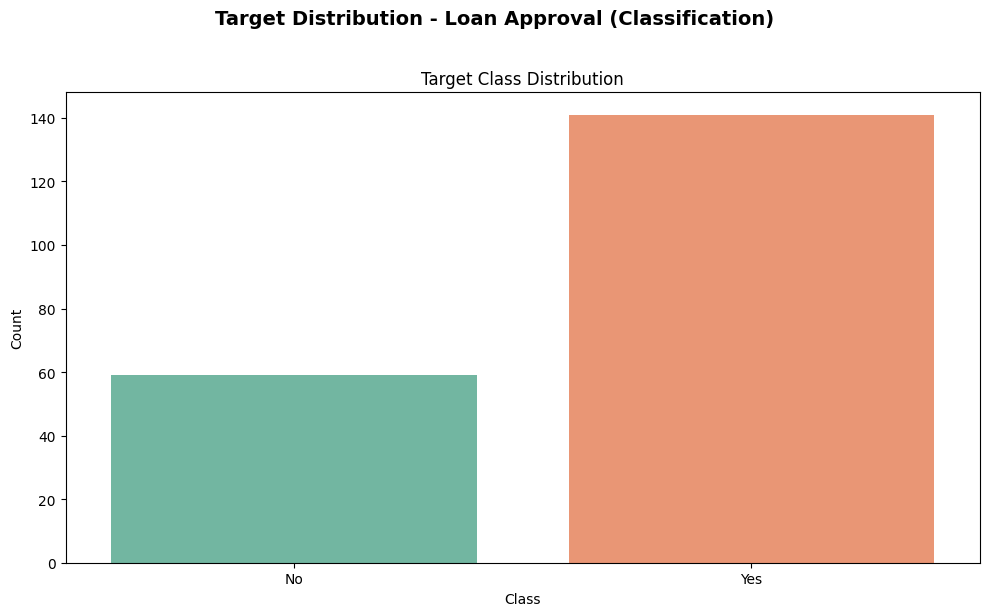

In [53]:
# Classification target distribution
fig, ax = plot_target_distribution(
    classification_df['approved'],
    task_type='classification',
    figsize=(10, 6)
)
fig.suptitle('Target Distribution - Loan Approval (Classification)', fontsize=14, fontweight='bold', y=1.02)
fig.tight_layout()
fig.show()

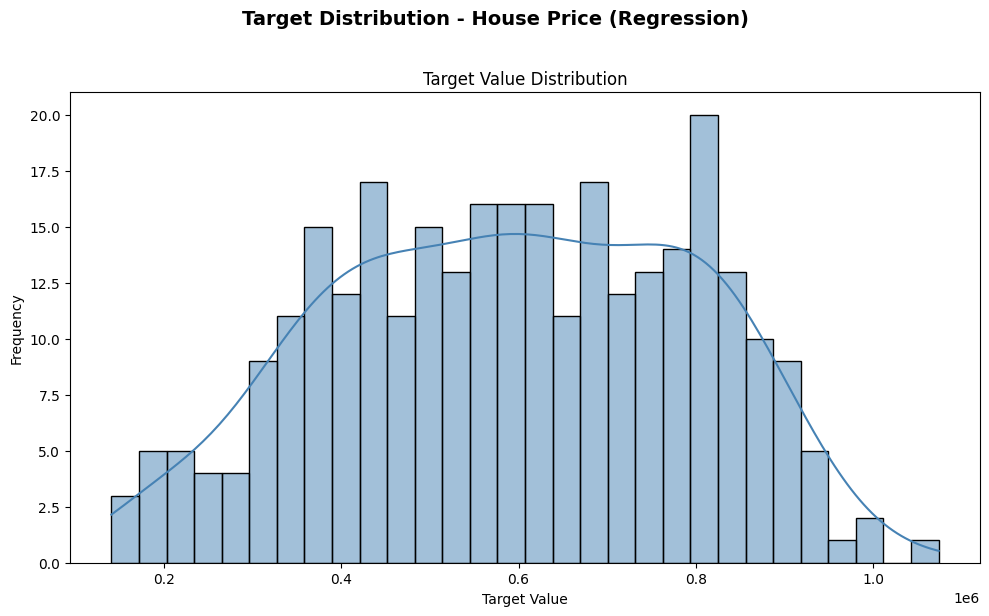

In [54]:
# Regression target distribution
fig, ax = plot_target_distribution(
    regression_df['price'],
    task_type='regression',
    figsize=(10, 6)
)
fig.suptitle('Target Distribution - House Price (Regression)', fontsize=14, fontweight='bold', y=1.02)
fig.tight_layout()
fig.show()

### 12.3 Missing Values Chart

Bar chart showing which columns have missing values and how much.

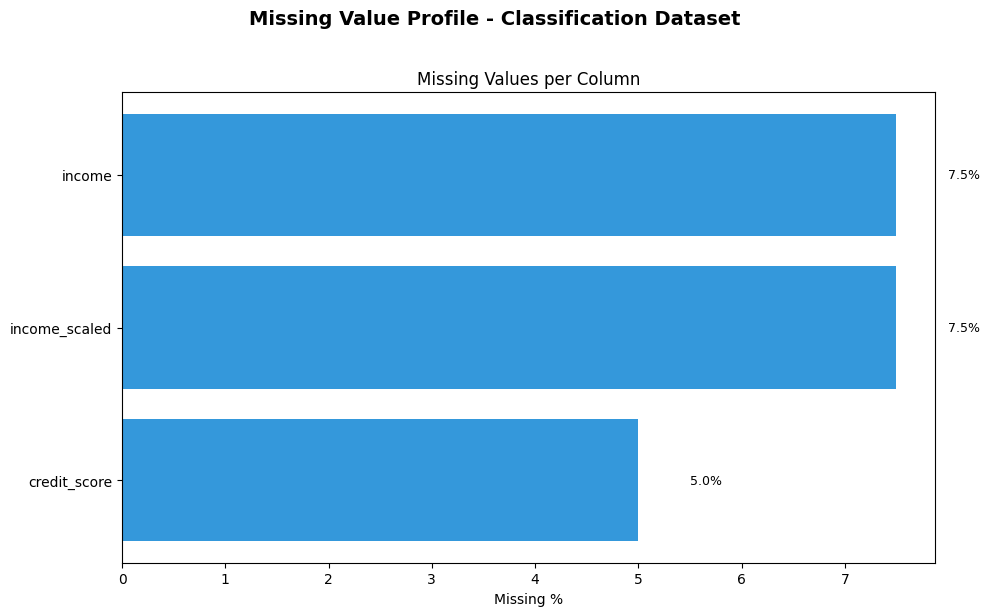

In [55]:
# Missing values in classification dataset
fig, ax = plot_missing_values(classification_df, top_n=20, figsize=(10, 6))
fig.suptitle('Missing Value Profile - Classification Dataset', fontsize=14, fontweight='bold', y=1.02)
fig.tight_layout()
fig.show()

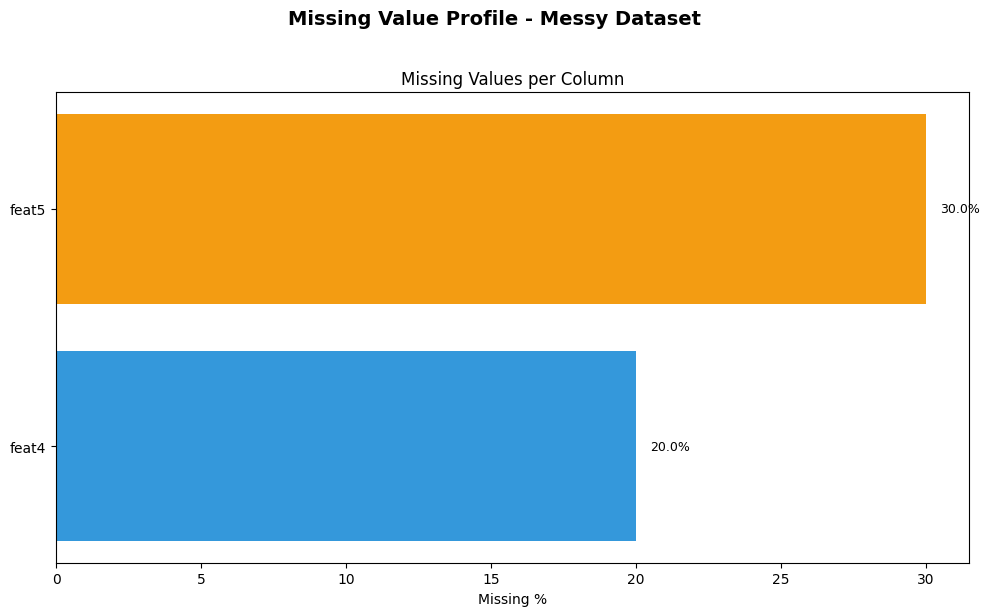

In [56]:
# Missing values in messy dataset (more interesting)
fig, ax = plot_missing_values(messy_df, top_n=20, figsize=(10, 6))
fig.suptitle('Missing Value Profile - Messy Dataset', fontsize=14, fontweight='bold', y=1.02)
fig.tight_layout()
fig.show()

### 12.4 Dataset Quality Radar Chart

Spider/radar chart showing 5 quality dimensions at a glance:
- Completeness (inverse of missing ratio)
- Balance (inverse of class imbalance)
- Independence (inverse of feature redundancy)
- Sufficiency (sample-to-feature ratio)
- Consistency (data type uniformity)

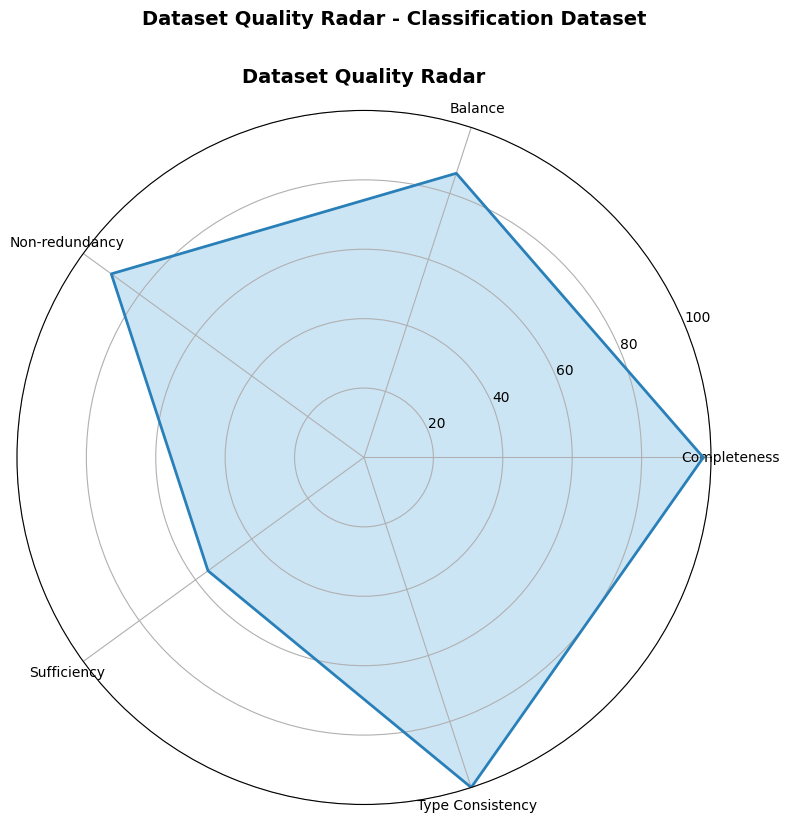

In [57]:
# Quality radar for classification dataset
fig, ax = plot_quality_radar(results.quality_details, figsize=(8, 8))
fig.suptitle('Dataset Quality Radar - Classification Dataset', fontsize=14, fontweight='bold', y=1.02)
fig.tight_layout()
fig.show()

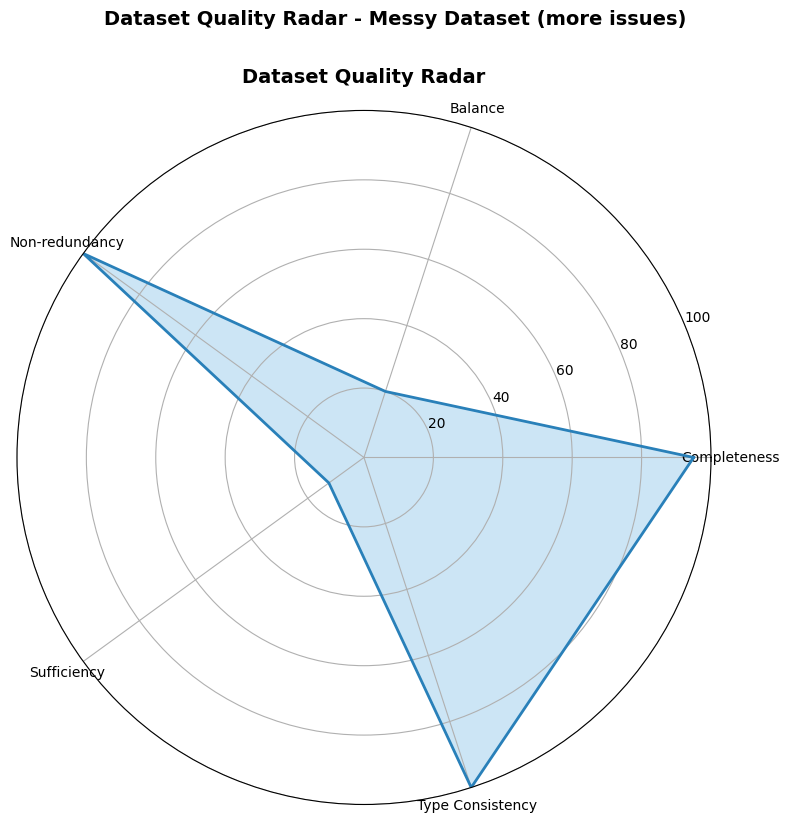

In [58]:
# Quality radar for messy dataset (should show weaker areas)
fig, ax = plot_quality_radar(messy_results.quality_details, figsize=(8, 8))
fig.suptitle('Dataset Quality Radar - Messy Dataset (more issues)', fontsize=14, fontweight='bold', y=1.02)
fig.tight_layout()
fig.show()

### 12.5 Model Comparison Chart

Compare recommended model suitability scores side by side.

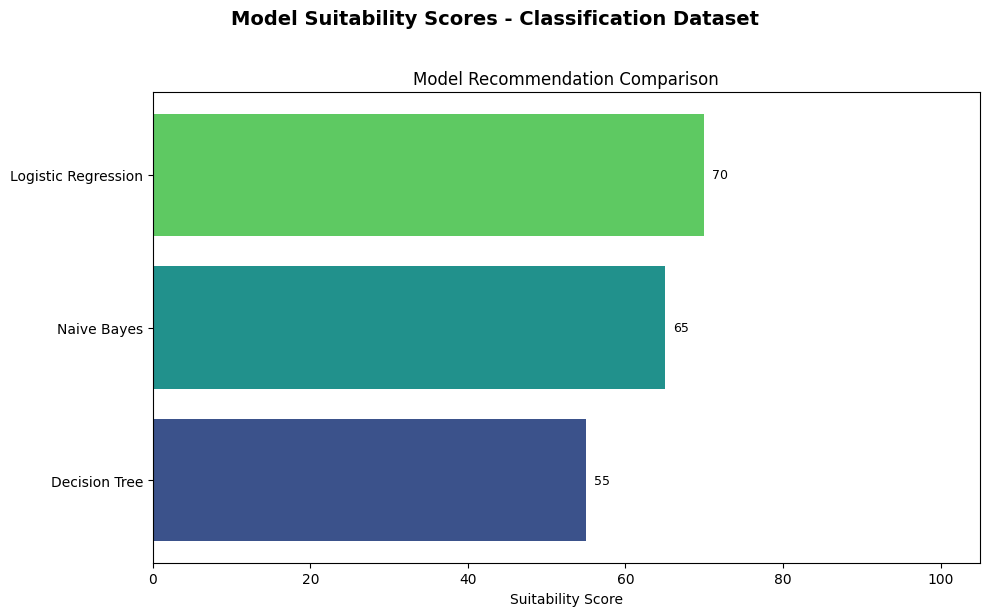

In [59]:
# Model comparison for classification results
fig, ax = plot_model_comparison(results.model_recommendations, top_n=8, figsize=(10, 6))
fig.suptitle('Model Suitability Scores - Classification Dataset', fontsize=14, fontweight='bold', y=1.02)
fig.tight_layout()
fig.show()

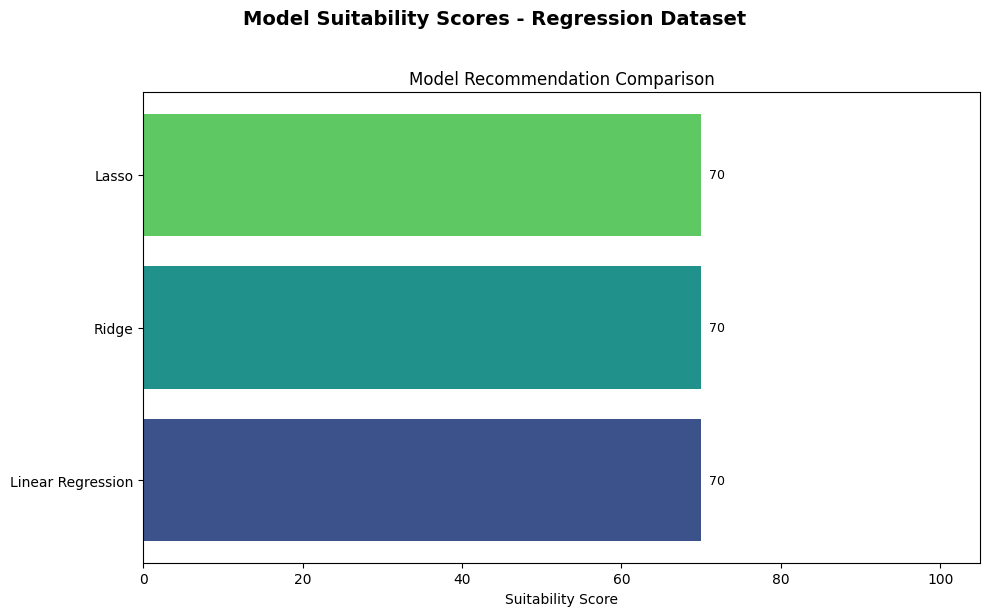

In [60]:
# Model comparison for regression results
fig, ax = plot_model_comparison(results_reg.model_recommendations, top_n=8, figsize=(10, 6))
fig.suptitle('Model Suitability Scores - Regression Dataset', fontsize=14, fontweight='bold', y=1.02)
fig.tight_layout()
fig.show()

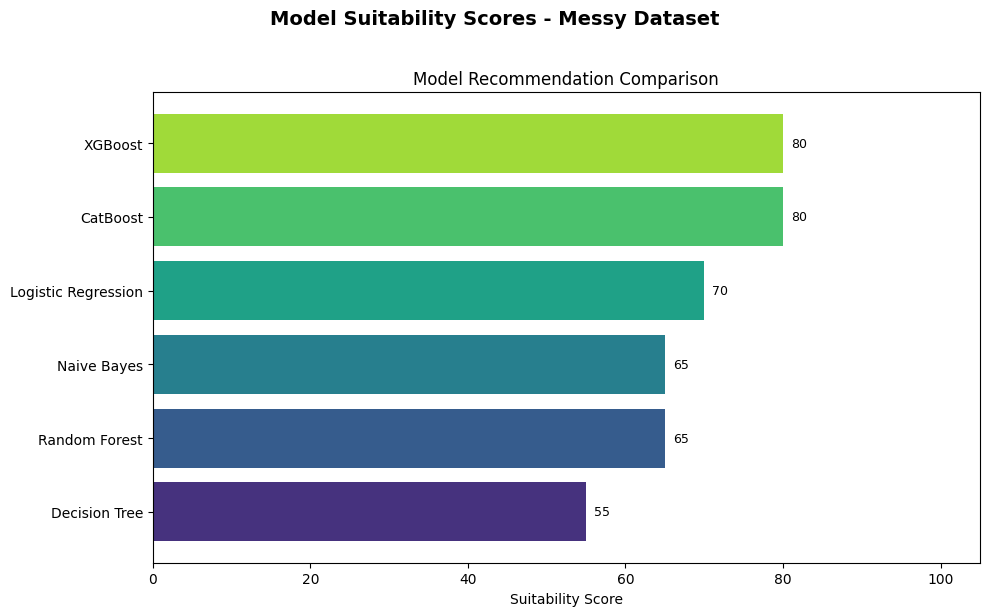

In [61]:
# Model comparison for messy dataset (more models recommended due to issues)
fig, ax = plot_model_comparison(messy_results.model_recommendations, top_n=8, figsize=(10, 6))
fig.suptitle('Model Suitability Scores - Messy Dataset', fontsize=14, fontweight='bold', y=1.02)
fig.tight_layout()
fig.show()

### 12.6 Feature Importance Chart

Visualize which features matter most for prediction.

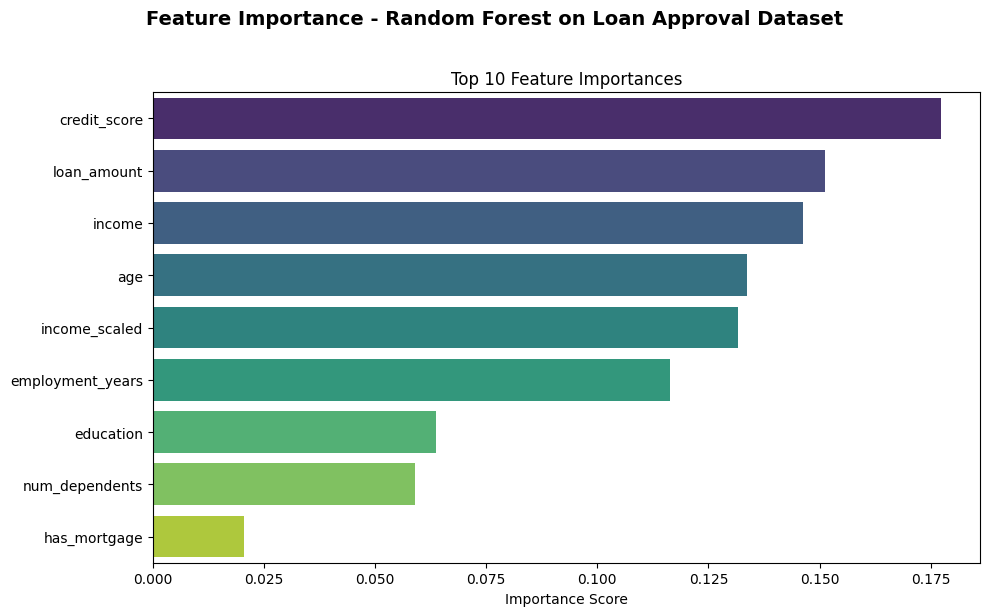

In [62]:
# Train a quick model to get feature importances for the demo
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Prepare data
X_demo = classification_df.drop(columns=['approved']).copy()
y_demo = LabelEncoder().fit_transform(classification_df['approved'])

# Encode categoricals and fill NaN for the demo
for col in X_demo.select_dtypes(include=['object']).columns:
    X_demo[col] = LabelEncoder().fit_transform(X_demo[col].astype(str))
X_demo = X_demo.fillna(X_demo.median())

# Train a quick Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_demo, y_demo)

# Plot feature importances
fig, ax = plot_feature_importance(
    feature_names=list(X_demo.columns),
    importances=rf.feature_importances_,
    top_n=10,
    figsize=(10, 6)
)
fig.suptitle('Feature Importance - Random Forest on Loan Approval Dataset', fontsize=14, fontweight='bold', y=1.02)
fig.tight_layout()
fig.show()

### 12.7 Regression Dataset - Correlation Matrix

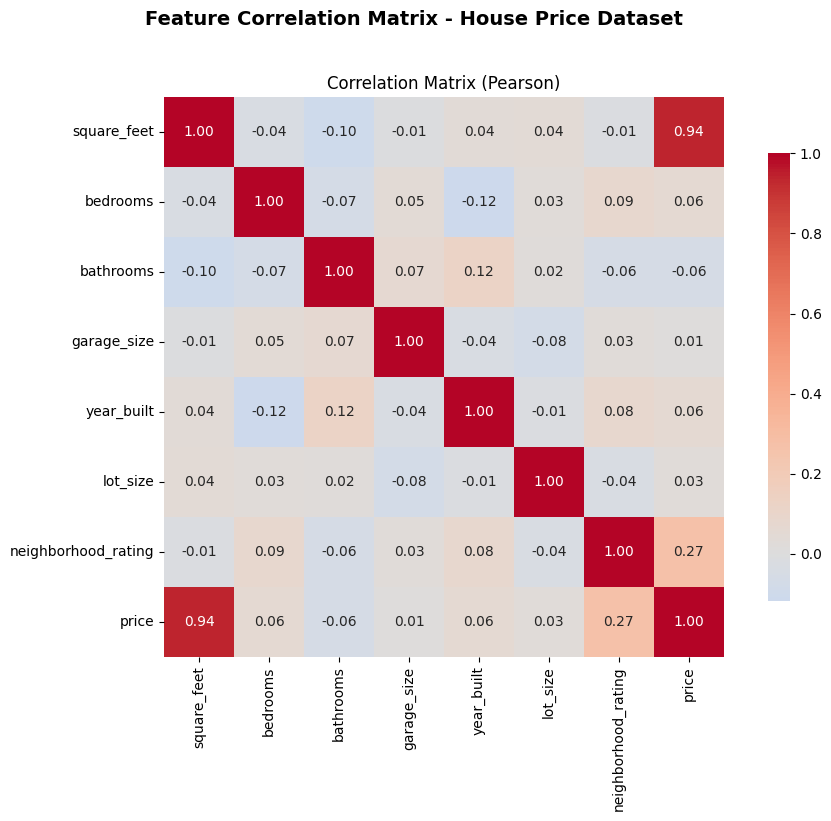

In [63]:
# Correlation matrix for regression dataset
fig, ax = plot_correlation_matrix(regression_df, figsize=(10, 8))
fig.suptitle('Feature Correlation Matrix - House Price Dataset', fontsize=14, fontweight='bold', y=1.02)
fig.tight_layout()
fig.show()

---
## Summary

PreMLCheck provides a **complete pre-training analysis** for any dataset:

| Module | What It Does |
|---|---|
| **TaskDetector** | Detects classification vs regression |
| **QualityChecker** | Health score (0-100) with detailed metrics |
| **OverfittingPredictor** | Risk level + contributing factors |
| **ModelRecommender** | Ranked list of suitable algorithms |
| **PerformanceEstimator** | Baseline performance before training |
| **PreprocessingAdvisor** | Prioritized suggestions with code examples |
| **ReportGenerator** | Full reports in Markdown, HTML, JSON |
| **Visualizers** | 6 built-in charts for data exploration |

All of this with a **single function call**: `analyzer.analyze(df, target_column)`

---

**Author:** Mudassar Hussain  
**GitHub:** [@MudassarGill](https://github.com/MudassarGill)  
**Email:** mudassarhussain6533@gmail.com